# Flattened dT analysis
Full combinatorics

In [1]:
# System tools  
import sys
from pathlib import Path
import warnings
warnings.filterwarnings("ignore") # suppress warnings

# Python stack 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak

# Internal modules 
sys.path.extend(["../../src/core", "../../src/utils"])
from draw import Draw
from io_manager import Load

# pyutils 
from pyutils.pyplot import Plot
plotter = Plot() # just use this for styles

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


## Load data

In [2]:

!ls -ltrh ../../output/dt/b/data

total 16K
drwxr-sr-x 2 sam sam 4.0K Dec  5 12:32 CRY_onspill-LH_aw
drwxr-sr-x 2 sam sam 4.0K Dec  5 12:36 CRY_mix2BB_onspill-LH_aw
drwxr-sr-x 2 sam sam 4.0K Dec  5 12:40 CE_onspill-LH_aw
drwxr-sr-x 2 sam sam 4.0K Dec  5 12:43 CE_mix2BB_onspill-LH_aw


In [3]:
run = "b"
base_in_path = Path(f"../../output/dt/{run}/data/")

# Load both test datasets
cry_path = base_in_path / "CRY_onspill-LH_aw/"
ce_mix2bb_path = base_in_path / "CE_mix2BB_onspill-LH_aw/"

print(f"Loading CRY data from: {cry_path}")
cry_data = Load(in_path=cry_path).load_pkl()["events"]

print(f"Loading CE Mix2BB data from: {ce_mix2bb_path}")
ce_mix_data = Load(in_path=ce_mix2bb_path).load_pkl()["events"]

print(f"CRY events: {len(cry_data)}")
print(f"CE mix2BB events: {len(ce_mix_data)}")

Loading CRY data from: ../../output/dt/b/data/CRY_onspill-LH_aw
[Load] ✅ Initialised with out_path=../../output/dt/b/data/CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/dt/b/data/CRY_onspill-LH_aw/results.pkl
Loading CE Mix2BB data from: ../../output/dt/b/data/CE_mix2BB_onspill-LH_aw
[Load] ✅ Initialised with out_path=../../output/dt/b/data/CE_mix2BB_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/dt/b/data/CE_mix2BB_onspill-LH_aw/results.pkl
CRY events: 23727
CE mix2BB events: 2139827


## Add duration  (could also do this in processing)

In [ ]:
## Add duration
cry_data["duration"] = cry_data["timeEnd"] - cry_data["timeStart"]
ce_mix_data["duration"] = ce_mix_data["timeEnd"] - ce_mix_data["timeStart"]

## Convert to DataFrame

In [4]:
# Convert awkward arrays to DataFrame
df_cry = ak.to_dataframe(cry_data)
df_ce_mix = ak.to_dataframe(ce_mix_data)

In [5]:
df_cry.head()
df_ce_mix.head()

,event,subrun,run,dT,crv_x,crv_y,crv_z,PEs,nHits,nLayers,...,timeStart,timeEnd,crv_time,sector,PEs_per_hit,t0,d0,tanDip,maxr,mom_mag
entry,,,,,,,,,,,,,,,,,,,,,
0,23.0,46.0,1210.0,851.097202,4317.791992,2873.401855,-9957.799805,1432.558228,65.0,4.0,...,404.583221,1104.583252,588.474487,4.0,22.039357,1439.571690,64.233398,0.939247,553.678711,104.528412
1,23.0,46.0,1210.0,17.841343,4168.450195,2891.504395,-9957.799805,238.057526,13.0,4.0,...,1392.083252,1754.583252,1421.730347,4.0,18.312117,1439.571690,64.233398,0.939247,553.678711,104.528412
2,23.0,46.0,1210.0,-147.009609,636.200012,1169.587524,-12563.380859,187.563354,12.0,4.0,...,1342.083252,1754.583252,1586.581299,5.0,15.630280,1439.571690,64.233398,0.939247,553.678711,104.528412
3,30.0,46.0,1210.0,-428.267026,-2587.561523,275.529999,-4173.916016,26.419159,3.0,3.0,...,1201.594727,1276.594727,1182.653442,1.0,8.806386,754.386416,33.225609,0.831509,483.464691,104.191429
4,30.0,46.0,1210.0,-622.537778,2556.410156,800.816956,-5141.687500,251.457169,12.0,3.0,...,1376.594727,1501.594727,1376.924194,2.0,20.954764,754.386416,33.225609,0.831509,483.464691,104.191429


## Develop time start/end cut 

reoptimisation for MDC2020aw

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
	Wrote ../../output/images/start_end_time/h1_2x2_start_end_time.png


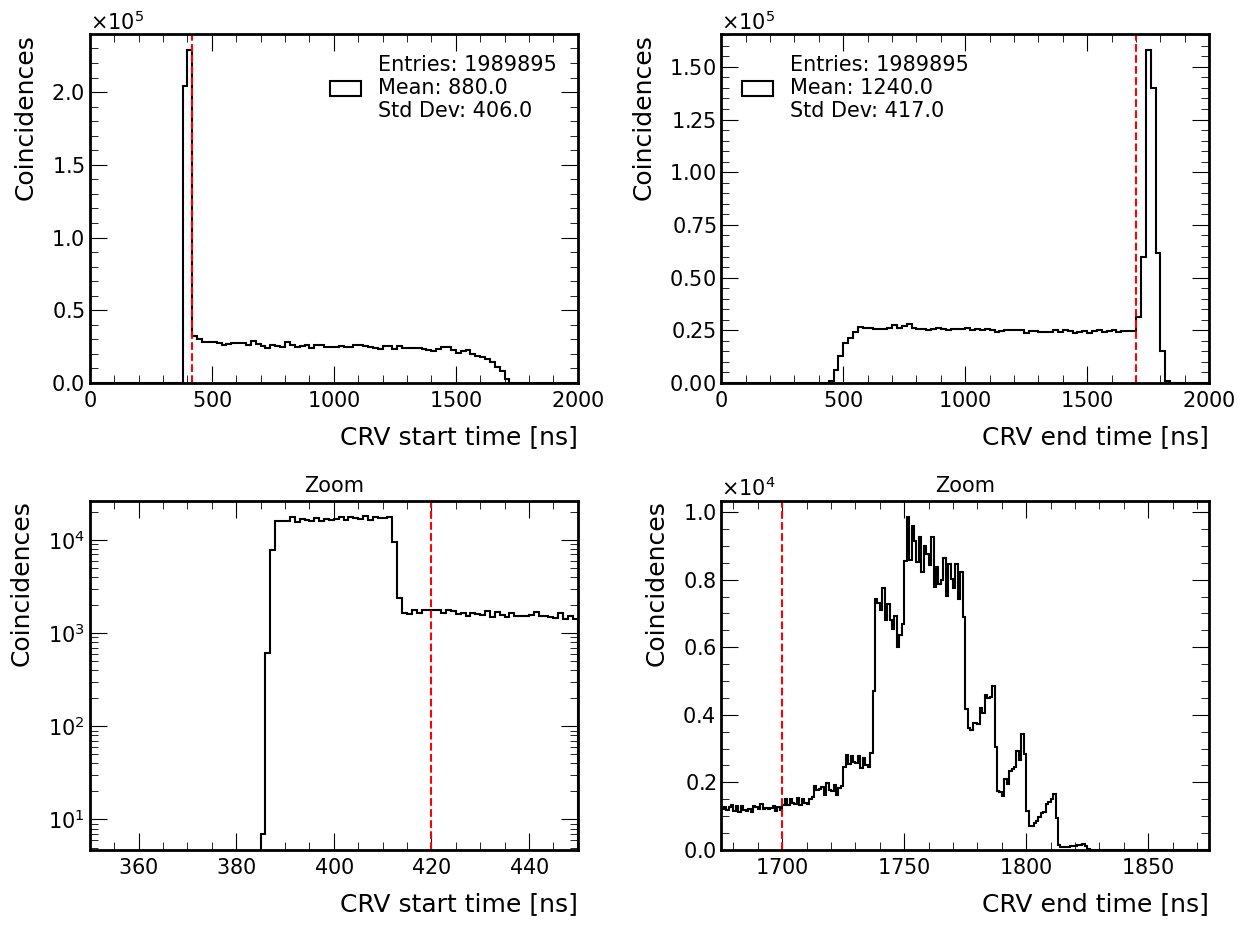

In [7]:
from pyutils.pyplot import Plot 

plotter = Plot()
fig, ax = plt.subplots(2, 2, figsize=(2*6.4, 2*4.8))

plotter.plot_1D(
    df_ce_mix["timeStart"],
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[0,0],
    # title="CE Mix2BB MDC2020aw",
    xlabel="CRV start time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False     
)

plotter.plot_1D(
    df_ce_mix["timeEnd"],
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[0,1],
    # title="CE Mix2BB MDC2020aw",
    xlabel="CRV end time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False,
   
)

plotter.plot_1D(
    df_ce_mix["timeStart"],
    nbins=100,  
    xmin=350,
    xmax=450,
    show=False,
    ax=ax[1,0],
    log_y=True,
    title="Zoom",
    xlabel="CRV start time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False,
    stat_box=False   
)

plotter.plot_1D(
    df_ce_mix["timeEnd"],
    nbins=200,  
    xmin=1675,
    xmax=1875,
    show=False,
    ax=ax[1,1],
    # log_y=True,
    title="Zoom",
    xlabel="CRV end time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False,
    stat_box=False     
)

ax[0,0].axvline(420, linestyle="--")
ax[0,1].axvline(1700, linestyle="--")

ax[1,0].axvline(420, linestyle="--")
ax[1,1].axvline(1700, linestyle="--")


plt.tight_layout()
img_base_path = Path(f"../../output/images/start_end_time/")
img_base_path.mkdir(exist_ok=True, parents=True)
out_name = img_base_path / "h1_2x2_start_end_time.png" 
plt.savefig(out_name)
print(f"\tWrote {out_name}")
plt.show()

	Wrote ../../output/images/start_end_time/h1o_1x2_start_end_time_cut.png


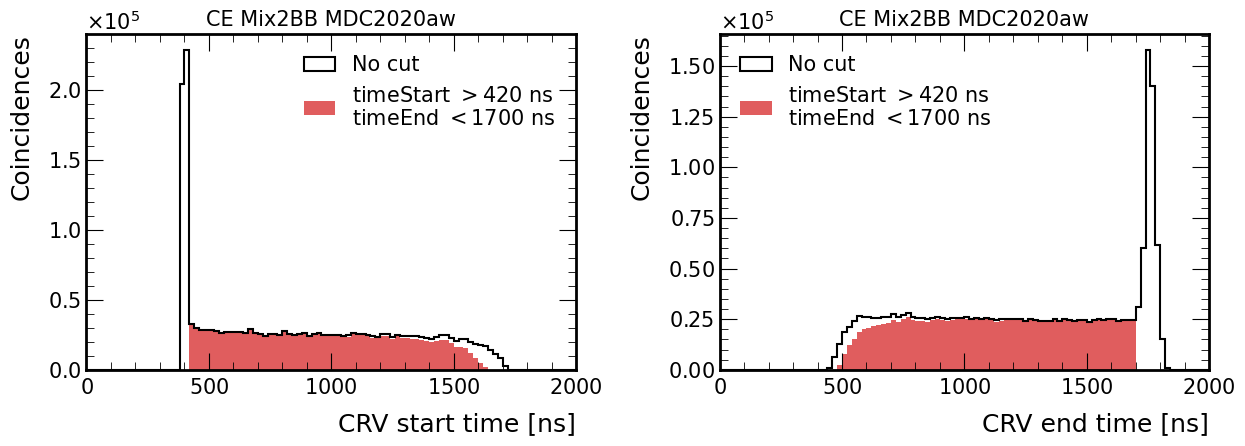

In [8]:
# Apply cut 
ce_mix_condition = ((df_ce_mix["timeStart"] > 420) & (df_ce_mix["timeEnd"] < 1700))

fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))

styles = {
    "No cut" : {
        "color": "black",
        "linestyle": "-"
    },
    "timeStart $>420$ ns\ntimeEnd $<1700$ ns" : {
        "color": "red",
        "histtype": "stepfilled",
        "alpha": 0.75
    },  

}

styles = {
    "No cut": {
        "color": "black",
        "linestyle": "-",
        "linewidth": 1.5,  # Make baseline more visible
        "zorder": 3  # Draw on top
    },
    "timeStart $>420$ ns\ntimeEnd $<1700$ ns": {
        "color": "#d62728",  # Slightly better red
        "histtype": "stepfilled",
        "alpha": 0.75,  # Slightly more transparent
        "edgecolor": "darkred",  # Add edge for definition
        "linewidth": 1.0,
        "zorder": 2
    },  
}

plotter.plot_1D_overlay(
    {
        "No cut" : df_ce_mix["timeStart"],
        "timeStart $>420$ ns\ntimeEnd $<1700$ ns" : df_ce_mix["timeStart"][ce_mix_condition]
    },
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[0],
    styles=styles,
    title="CE Mix2BB MDC2020aw",
    xlabel="CRV start time [ns]", 
    ylabel="Coincidences",
    norm_by_area=False     
)

plotter.plot_1D_overlay(
    {
        "No cut" : df_ce_mix["timeEnd"],
        "timeStart $>420$ ns\ntimeEnd $<1700$ ns" : df_ce_mix["timeEnd"][ce_mix_condition]
    },
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[1],
    styles=styles,
    title="CE Mix2BB MDC2020aw",
    xlabel="CRV end time [ns]", 
    ylabel="Coincidences",
)

plt.tight_layout()

out_name = img_base_path / "h1o_1x2_start_end_time_cut.png" 
plt.savefig(out_name)
print(f"\tWrote {out_name}")
plt.show()

In [10]:
def get_start_end_cut_impact(df, metric, start_end_window=(420, 1700), dt_window=(-25, 150)):
    """
    Calculate deadtime or efficiency before and after applying a start/endtime condition.
    Returns a summary DataFrame with statistics.
    """
    dt_min, dt_max = dt_window

    def get_veto_stats(data, label):
        # Find unique (event, subrun) pairs
        total_events = set(zip(data['event'], data['subrun']))
        # Find events with at least one dT in window
        in_window = (data['dT'] >= dt_min) & (data['dT'] <= dt_max)
        passing_events = set(zip(data.loc[in_window, 'event'], data.loc[in_window, 'subrun']))
        fraction = len(passing_events) / len(total_events) if len(total_events) > 0 else 0
        return {
            'condition': label,
            'total_events': len(total_events),
            'passing_events': len(passing_events),
            f'{metric}_percent': fraction * 100
        }

    start, end = start_end_window
    condition = (df["timeStart"] > start) & (df["timeEnd"] < end)

    # Calculate statistics before and after cut
    stats_before = get_veto_stats(df, 'Before cut')
    stats_after = get_veto_stats(df[condition], 'After cut')

    # Add change row
    change = {
        'condition': 'Change',
        'total_events': stats_after['total_events'] - stats_before['total_events'],
        'passing_events': stats_after['passing_events'] - stats_before['passing_events'],
        f'{metric}_percent': stats_after[f'{metric}_percent'] - stats_before[f'{metric}_percent']
    }

    # Create summary DataFrame
    summary = pd.DataFrame([stats_before, stats_after, change])
    # print(f"Summary for metric: {metric}")
    # display(summary)
    return summary

# Example usage after function definition
summary_ce_mix = get_start_end_cut_impact(df_ce_mix, metric="deadtime")
summary_cry  = get_start_end_cut_impact(df_cry, metric="efficiency")

print("timeStart > 420 ns & timeEnd < 1700 ns")
print("="*70)
display(summary_ce_mix)
display(summary_cry)

results_base_path = Path(f"../../output/dt/start_end_time/results")
results_base_path.mkdir(exist_ok=True, parents=True)
out_name_ce_mix = results_base_path / "summary_start_end_cut_ce_mix.csv" 
out_name_cry = results_base_path / "summary_start_end_cut_ce_mix.csv" 

summary_ce_mix.to_csv(out_name_ce_mix, index=False)
summary_cry.to_csv(out_name_cry, index=False)

print(f"\tWrote {out_name_ce_mix}")
print(f"\tWrote {out_name_cry}")
plt.show()

timeStart > 420 ns & timeEnd < 1700 ns


,condition,total_events,passing_events,deadtime_percent
0,Before cut,578372,179144,30.973837
1,After cut,403809,149941,37.131664
2,Change,-174563,-29203,6.157827


,condition,total_events,passing_events,efficiency_percent
0,Before cut,20087,20077,99.950217
1,After cut,19641,19637,99.979634
2,Change,-446,-440,0.029418


	Wrote ../../output/dt/start_end_time/results/summary_start_end_cut_ce_mix.csv
	Wrote ../../output/dt/start_end_time/results/summary_start_end_cut_ce_mix.csv


## Apply cut 

In [ ]:
def apply_start_end_cut(df, start_end_window=(420, 1700)):
    """"""
    start, end = start_end_window
    condition = (df["timeStart"] > start) & (df["timeEnd"] < end)
    return df[condition]

df_cry = apply_start_end_cut(df_cry)
df_ce_mix = apply_start_end_cut(df_ce_mix)

	Wrote ../../output/images/start_end_time/h1o_1x2_start_end_time_cut_verify.png


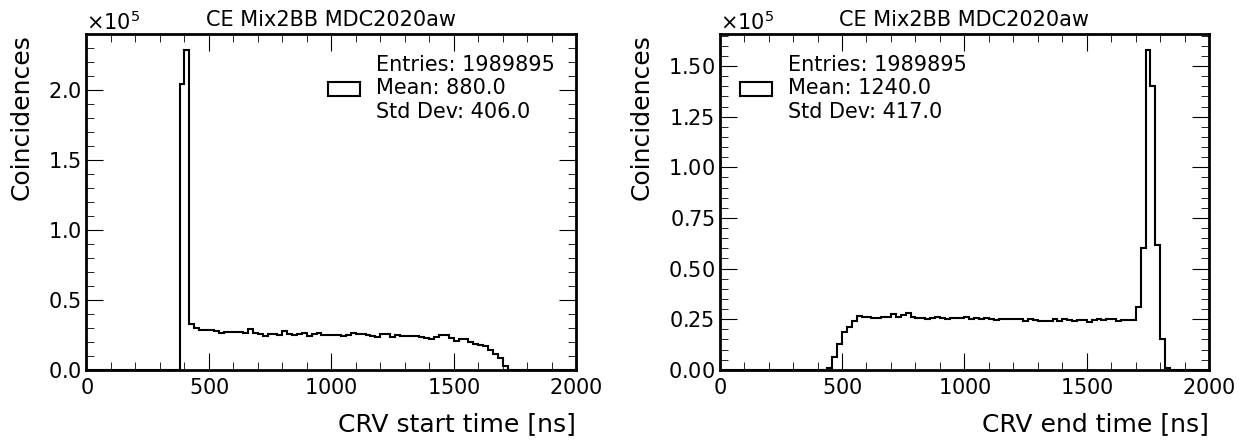

In [11]:
# Apply cut 

fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 1*4.8))


plotter.plot_1D(
    df_ce_mix["timeStart"],
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[0],
    title="CE Mix2BB MDC2020aw",
    xlabel="CRV start time [ns]", 
    ylabel="Coincidences",
)

plotter.plot_1D(
    df_ce_mix["timeEnd"],
    nbins=100,  
    xmin=0,
    xmax=2000,
    show=False,
    ax=ax[1],
    title="CE Mix2BB MDC2020aw",
    xlabel="CRV end time [ns]", 
    ylabel="Coincidences",
)

plt.tight_layout()

out_name = img_base_path / "h1o_1x2_start_end_time_cut_verify.png" 
plt.savefig(out_name)
print(f"\tWrote {out_name}")
plt.show()